<div class="alert alert-info">

En este notebook se utilizara el modelo de clasificación **Árbol de Decisión** para generar una plantilla para **Proyectos y/o Portafolio** en **Machine Learning** como un tipo básico de  **Aprendizaje Supervizado**.
    
</div>



# Objetivos:

1. Crear un Proyecto y/o Portafolio en **Machine Learning**
2. Modelo de Clasificación **Árbol de Decisión**.
3. Modelo para u tipo **Aprendizaje Supervisado** con librerías en **sklearn**.

algunas funciones importantes de pandas.


[1. Árboles de Decisión para Clasificación](#1.-Árboles-de-Decisión-para-Clasificación)<br>

[BIBLIOGRAFÍA](#BIBLIOGRAFÍA)<br>

## <font color=#33A5FF>****1. Árboles de Decisión para Clasificación****<tfont>

<div class="alert alert-info">

Un árbol tiene muchas analogías en la vida real, y resulta que ha influido en una amplia área del aprendizaje automático o Machine Learning. Los árboles de decisión son una técnica de aprendizaje supervisado que predice valores de respuestas mediante el aprendizaje de reglas de decisión derivadas de características. Se pueden utilizar tanto en una **regresión como en un contexto de clasificación**.



</div>

<img src="https://user-images.githubusercontent.com/19308295/125208763-2758d800-e25a-11eb-87cf-6ca5db85c4ff.png" width="600" height="100" />

<div class="alert alert-info">

Los árboles de decisión funcionan al dividir el espacio de la característica en varias **regiones rectangulares simples**, divididas por **divisiones paralelas de ejes**. Para obtener una predicción para una observación particular, se utiliza la media o el modo de las respuestas de las observaciones de entrenamiento, dentro de la partición a la que pertenece la nueva observación.

</div>

## Librerías a utilizar

In [116]:
#Se importan la librerias a utilizar
import numpy as np
import pandas as pd

## Importación de datos

El proyecto que vamos a desarrollar es de Conjunto de datos de plantas de iris, que se encuentra disponible en la librería scikit learn.

Los datos esta almacenados en archivo `iris.csv` que se encuentra en el directorio `data`

In [92]:
!rm capitall.csv
!wget https://raw.githubusercontent.com/M0vski/Prueba/master/e/capitall.csv
dataset = pd.read_csv('capitall.csv',
                      names= ['Sno','CapitalCity','Country','Continent','Latitude','Longitude'])



--2024-07-30 23:05:37--  https://raw.githubusercontent.com/M0vski/Prueba/master/e/capitall.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9122 (8.9K) [text/plain]
Saving to: ‘capitall.csv’

capitall.csv        100%[===================>]   8.91K  --.-KB/s    in 0s      

2024-07-30 23:05:37 (46.8 MB/s) - ‘capitall.csv’ saved [9122/9122]



In [93]:
dataset.head()

,Sno,CapitalCity,Country,Continent,Latitude,Longitude
0,1,Abu Dhabi,United Arab Emirates,Asia,24.28N,54.22E
1,2,Abuja,Nigeria,Africa,09.05N,07.32E
2,3,Accra,Ghana,Africa,05.35N,00.06W
3,4,Addis Ababa,Ethiopia,Africa,09.02N,38.42E
4,5,Algiers,Algeria,Africa,36.42N,03.08E


In [74]:
dataset.tail()

,Sno,CapitalCity,Country,Continent,Latitude,Longitude
190,196,Windhoek,Namibia,Africa,22.35S,17.04E
191,197,Yamoussoukro,Côte d'Ivoire (Ivory Coast),Africa,06.49N,05.17W
192,198,Yaounde,Cameroon,Africa,03.50N,11.35E
193,199,Yerevan,Armenia,Asia,40.10N,44.31E
194,200,Zagreb,Croatia,Europe,45.50N,15.58E


## Exploración de datos

### Tamaño Dataframe

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sno          196 non-null    int64 
 1   CapitalCity  196 non-null    object
 2   Country      196 non-null    object
 3   Continent    196 non-null    object
 4   Latitude     196 non-null    object
 5   Longitude    196 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.3+ KB


In [56]:
dataset.dtypes

,0
Sno,int64
CapitalCity,object
Country,object
Continent,object
Latitude,object
Longitude,object


In [57]:
dataset.shape

(196, 6)

In [58]:
#Verifico la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
dataset.count()

Cantidad de datos:


,0
Sno,196
CapitalCity,196
Country,196
Continent,196
Latitude,196
Longitude,196


In [59]:
#Verifico los valores nulos
dataset.isnull().sum()

,0
Sno,0
CapitalCity,0
Country,0
Continent,0
Latitude,0
Longitude,0


In [60]:
#Nombres de columnas
dataset.columns

Index(['Sno', 'CapitalCity', 'Country', 'Continent', 'Latitude', 'Longitude'], dtype='object')

In [75]:
dataset.describe()

,Sno
count,195.000000
mean,99.415385
std,57.963878
min,1.000000
25%,49.500000
50%,99.000000
75%,149.500000
max,200.000000


## Preparación de los datos para Árboles de Decisión Clasificación

Para este ejemplo vamos a implementar un clasificador Árboles de Decisión Clasificación, para este algoritmo se requiere todas las variables independientes, para nuestro caso serán las variables **Caracteristica**.

Ahora vamos a proceder a definir las variables de “X” y “y” que vamos emplear en nuestro modelo.

Para “X” vamos a utilizar todas las variables de caracteristicas, por lo que la igualamos a las primeras 4 columnas.

In [173]:
dataset.head()

,Sno,CapitalCity,Country,Continent,Latitude,Longitude
0,1,Abu Dhabi,United Arab Emirates,Asia,24.28N,54.22E
1,2,Abuja,Nigeria,Africa,09.05N,07.32E
2,3,Accra,Ghana,Africa,05.35N,00.06W
3,4,Addis Ababa,Ethiopia,Africa,09.02N,38.42E
4,5,Algiers,Algeria,Africa,36.42N,03.08E


In [186]:
#Seleccionamos todas las columnas de carasteristicas
X = dataset[dataset.columns[:-1]].to_numpy()

In [187]:
print(X)

[[1 'Abu Dhabi' 'United Arab Emirates' 'Asia' '24.28N']
 [2 'Abuja' 'Nigeria' 'Africa' '09.05N']
 [3 'Accra' 'Ghana' 'Africa' '05.35N']
 [4 'Addis Ababa' 'Ethiopia' 'Africa' '09.02N']
 [5 'Algiers' 'Algeria' 'Africa' '36.42N']
 [6 'Amman' 'Jordan' 'Asia' '31.57N']
 [7 'Amsterdam' 'Netherlands' 'Europe' '12.05N']
 [8 'Andorra la Vella' 'Andorra' 'Europe' '42.31N']
 [9 'Ankara' 'Türkiye (Turkey)' 'Asia' '39.57N']
 [10 'Antananarivo' 'Madagascar' 'Africa' '18.55S']
 [11 'Apia' 'Samoa' 'Oceania and Australia' '14.16S']
 [12 'Ashgabat' 'Turkmenistan' 'Asia' '38.00N']
 [13 'Asmara' 'Eritrea' 'Africa' '15.19N']
 [14 'Astana' 'Kazakhstan' 'Asia' '51.10N']
 [15 'Asuncion' 'Paraguay' 'South America' '25.10S']
 [16 'Athens' 'Greece' 'Europe' '37.58N']
 [17 'Baghdad' 'Iraq' 'Asia' '33.20N']
 [18 'Baku' 'Azerbaijan' 'Asia' '40.29N']
 [19 'Bamako' 'Mali' 'Africa' '12.34N']
 [20 'Bandar Seri Begawan' 'Brunei' 'Asia' '04.52N']
 [21 'Bangkok' 'Thailand' 'Asia' '13.45N']
 [22 'Bangui' 'Central African R

Por su parte, “y” será igual a los datos correspondientes a “etiquetas” por lo que igualamos esta variable a la ultima columna.

In [188]:
#Defino los datos correspondientes a las etiquetas
y = dataset[dataset.columns[-1]].to_numpy()

In [189]:
print(y)

['54.22E' '07.32E' '00.06W' '38.42E' '03.08E' '35.52E' '69.00W' '01.32E'
 '32.54E' '47.31E' '170.43W' '57.50E' '38.55E' '71.30E' '57.30W' '23.46E'
 '44.30E' '49.56E' '07.55W' '115.00E' '100.35E' '18.35E' '16.40W' '62.43W'
 '116.20E' '35.31E' '05.93W' '20.46E' '88.30W' '13.25E' '07.28E' '74.46E'
 '15.45W' '74.00W' '47.55W' '17.07E' '15.12E' '59.30W' '04.21E' '26.10E'
 '19.05E' '60.00W' '31.14E' '149.08E' '66.55W' '03.16W' '60.58W' '28.50E'
 '13.49W' '12.34E' '17.29W' '36.18E' '90.26E' '125.34E' '42.20E' '35.74E'
 '51.35E' '06.15W' '68.48E' '03.18W' '13.17W' '179.13E' '25.57E' '58.12W'
 '29.18E' '90.22W' '105.55E' '31.02E' '82.22W' '25.03E' '159.57E' '73.10E'
 '106.49E' '35.21E' '35.10W' '31.58E' '69.11E' '32.30E' '85.20E' '32.35E'
 '30.04E' '76.50W' '61.10W' '15.15E' '101.41E' '48.00E' '30.28E' '68.10W'
 '09.26E' '33.48E' '77.00W' '09.10W' '14.33E' '01.20E' '00.05W' '13.15E'
 '28.16E' '06.09E' '03.45W' '171.26E' '08.50E' '73.28E' '86.20W' '50.30E'
 '121.03E' '32.32E' '27.30E' '134.6243E

Recuerda que “y” cuenta con una sola columna con solamente ceros, unos y dos, corresponden a setosa, versicolor, y virginica respectivamente

## Implementación de Árboles de Decisión Clasificación

Definido “X” y “y” ya podemos realizar la separación correspondiente a los datos de prueba y entrenamiento para ello importamos la respectiva librería y procedemos a utilizar train_test_split para separar los datos.

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo.

In [191]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
categorical_features = ['CapitalCity','Country','Continent','Latitude','Longitude']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
X = transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



ValueError: Specifying the columns using strings is only supported for pandas DataFrames

Seguidamente definimos el algoritmo, entonces decimos desde skelarn.tree importamos DecisionTreeClasiffier. Acá lo que indicamos es que desde el modulo de árboles de skelearn, vamos a importar el algoritmo de árboles de decisión clasificación, recuerda que ese algoritmo también funciona para problemas de regresión.

In [184]:
#Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
algoritmo = DecisionTreeClassifier(criterion='entropy')

Ahora definimos el algoritmo y lo configuramos para crear el modelo y entrenarlo. En este caso el único parámetro que vamos a configurar es el referente a “criterion” que se refiere a la medida de selección. Por defecto este parámetro viene configurado con el índice Gini pero para nuestro ejercicio lo voy a cambiar por “entropy” o entropía en español. Para entender mejor esto te recomiendo que buques la información publicada sobre la librería scikit learn para este algoritmo.

Definido esto ahora entrenamos el algoritmo, utilizando la instrucción fit() junto con los datos de entrenamiento separados previamente.

In [185]:
#Entreno el modelo
algoritmo.fit(X_train, y_train)

ValueError: could not convert string to float: 'Washington D.C.'

## Verificación del modelo desarrollado

A llegado el momento de verificar que tan preciso es el modelo desarrollado para ello utilizamos modulo `score` de los Datos de Prueba.

In [172]:
precision = algoritmo.score(X_test, y_test)
print('Precision del modelo Datos Prueba:')
print(precision)

Precision del modelo Datos Prueba:
0.0


El resultado de este calculo es de 0,966 un valor bastante aceptable.

Con esto podemos concluir que con este algoritmo también podemos obtener muy buenos resultados con este conjunto de datos. Ya queda de tu parte si deseas mejorarlo y ver si es posible obtener algo más preciso, para ello puedes modificar los datos de la configuración del algoritmo, por ejemplo cambiando la medida de selección.

In [168]:
precision2 = algoritmo.score(X_train, y_train)
print('Precision del modelo Datos Entrenamiento:')
print(precision2)

Precision del modelo Datos Entrenamiento:
1.0


**eso se llama SOBREAJUSTE**

## Gráficamos nuestro Árbol

Importamos Librerias para graficar

instalar `conda install -c anaconda graphviz`

instalar `conda install -c conda-forge python-graphviz`

In [132]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt

Generamos archivo `.dot` que contiene la grafica

In [151]:
export_graphviz(algoritmo,out_file='arbol.dot',
               feature_names=('CapitalCity','Country','Continent','Latitude','Longitude'),
               impurity=False, filled=True)



[Text(0.49306906614785995, 0.95, 'x[2] <= 97.5\nentropy = 7.26\nsamples = 156\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]'), Text(0.24148832684824903, 0.85, 'x[0] <= 100.5\nentropy = 6.26\nsamples = 78\nvalue = [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0\n0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1\n0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1\n1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0\n0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0\n1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0\n0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1\n0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1\n1, 1, 0, 0, 0, 0, 0, 1, 

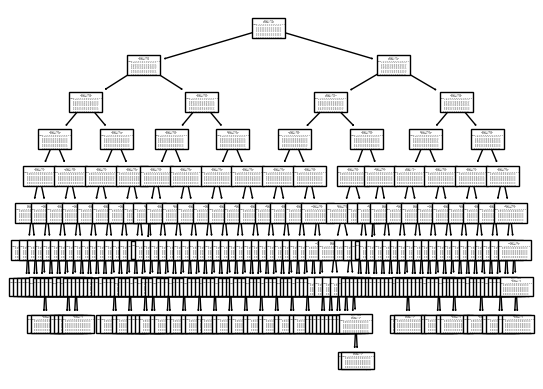

In [152]:
grafico=tree.plot_tree(algoritmo)

print(grafico)

Creamos la gráfica

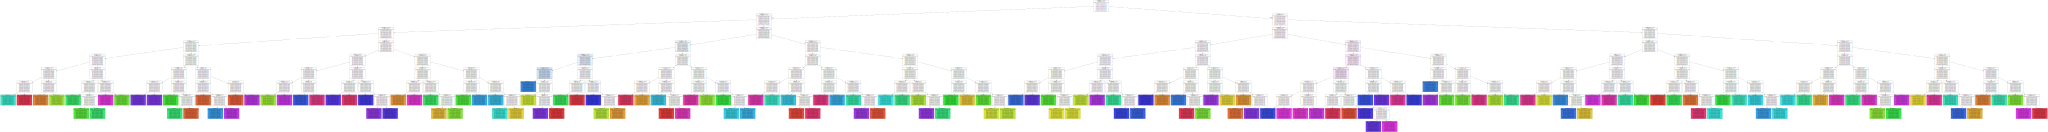

In [169]:
with open('arbol.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)


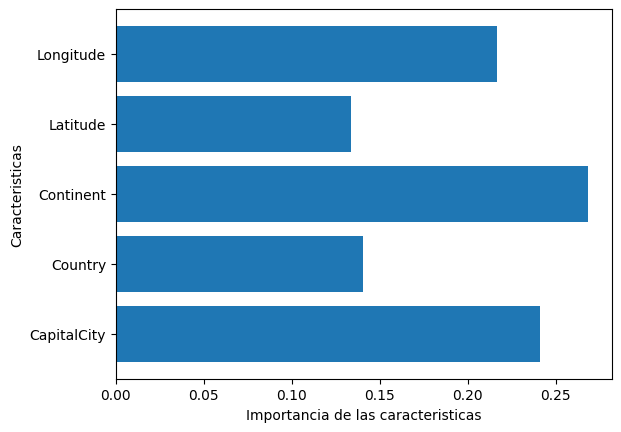

In [138]:
caract=X.shape[1]
plt.barh(range(caract), algoritmo.feature_importances_)
plt.yticks(np.arange(caract), ('CapitalCity','Country','Continent','Latitude','Longitude'))
plt.xlabel('Importancia de las caracteristicas')
plt.ylabel('Caracteristicas')
plt.show()

## Volvemos a entrenar el modelo con 3 niveles evitando sobreajuste

In [139]:
#Arboles de decisión
algoritmo = DecisionTreeClassifier(max_depth=3)

In [140]:
#Entreno el modelo
algoritmo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [141]:
precision = algoritmo.score(X_test, y_test)
print('Precision del modelo Datos Prueba')
print(precision)

Precision del modelo Datos Prueba
0.0


In [142]:
precision2 = algoritmo.score(X_train, y_train)
print('Precision del modelo Datos Entrenamiento')
print(precision2)



Precision del modelo Datos Entrenamiento
0.0641025641025641


In [143]:
export_graphviz(algoritmo,out_file='arbol2.dot',
               feature_names=('CapitalCity','Country','Continent','Latitude','Longitude'),
               impurity=False, filled=True)

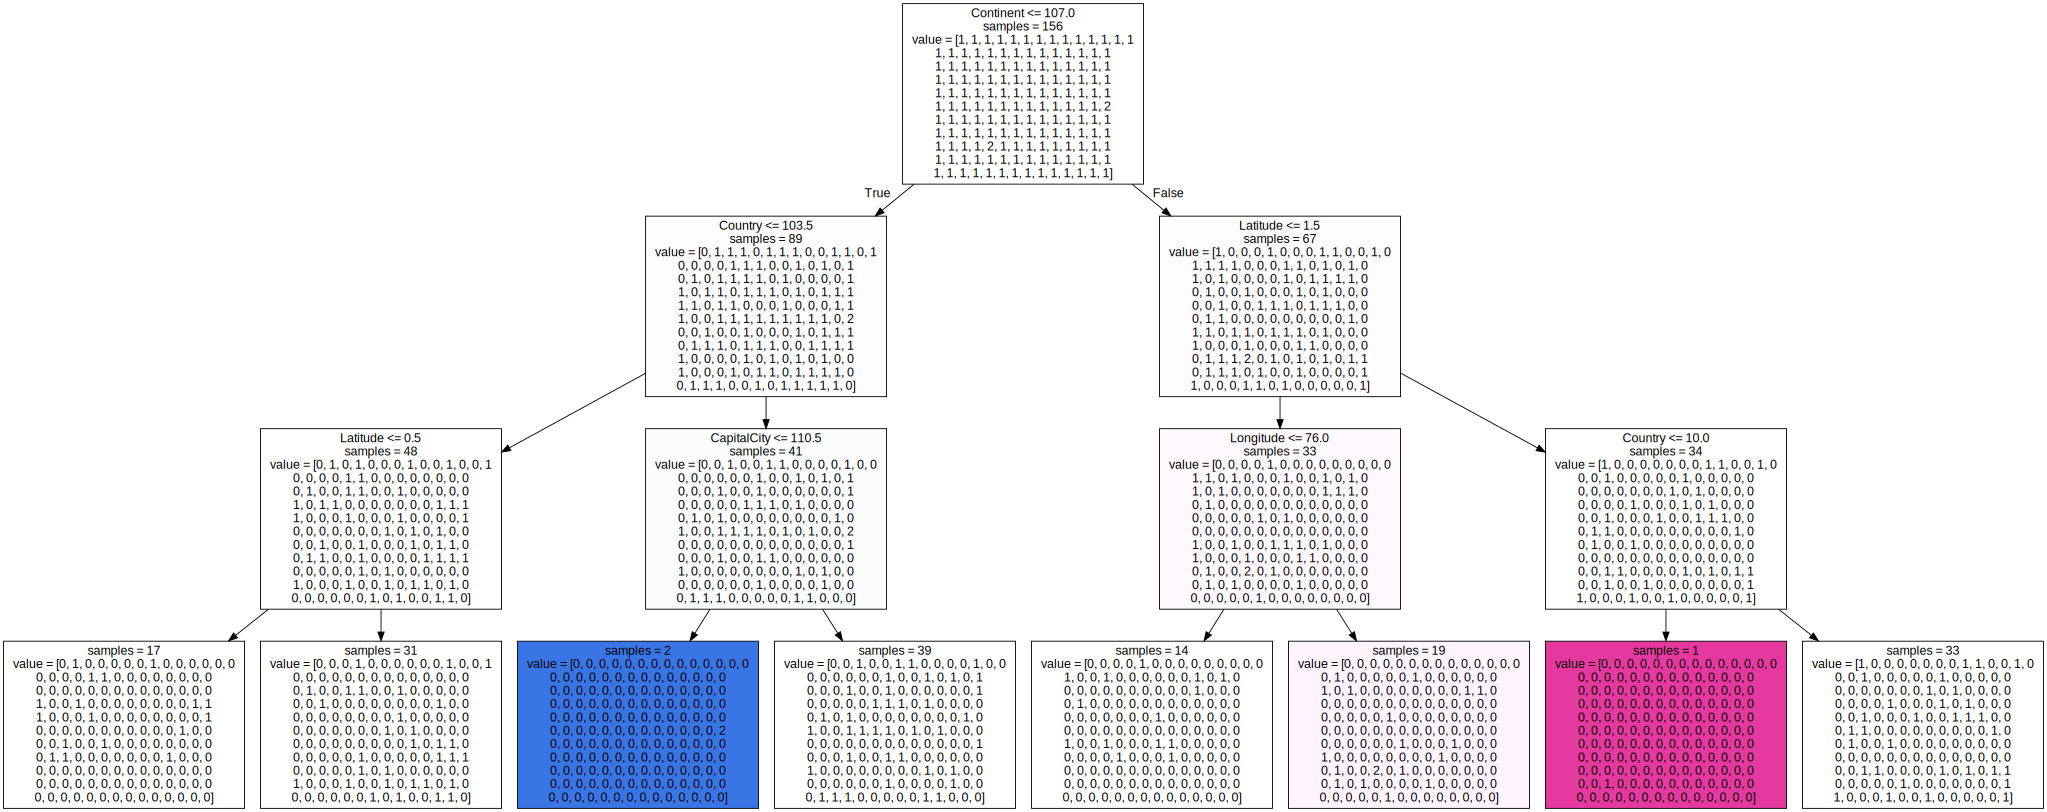

In [144]:
with open('arbol2.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)



![linea 2](https://user-images.githubusercontent.com/19308295/115926262-2fb62980-a448-11eb-8189-c2f10e499944.png)

## <font color=#33A5FF>****BIBLIOGRAFÍA****<tfont>

[1] Guía oficial scikit learn https://scikit-learn.org/stable/

[2] Datasets de Scikit Learn: https://scikit-learn.org/stable/datasets/toy_dataset.html

[3] Scikit Learn DecisionTreeClassifier : https://bit.ly/398XAIv

[4] Scikit Learn export_graphviz : https://bit.ly/2ZAbHDt

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)